# Decision Tree
* Works like conditional statement

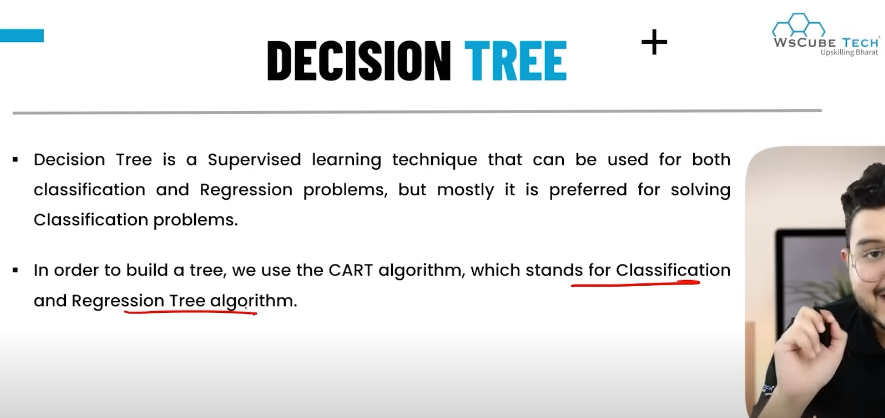

* This splits the data into binary and goes down tbe tree
* 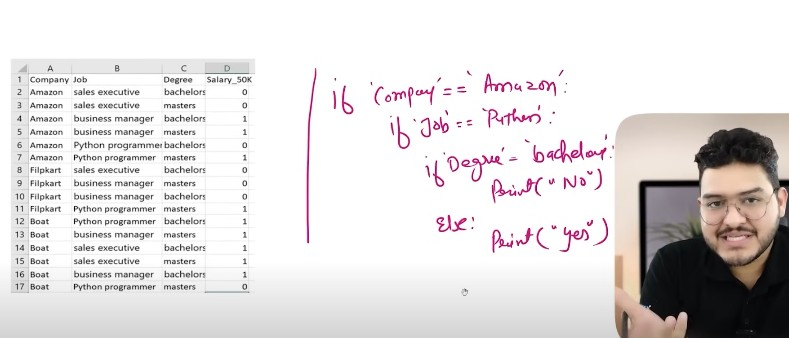

* DT always works on **non-linear** spitting data
* 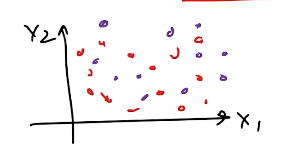

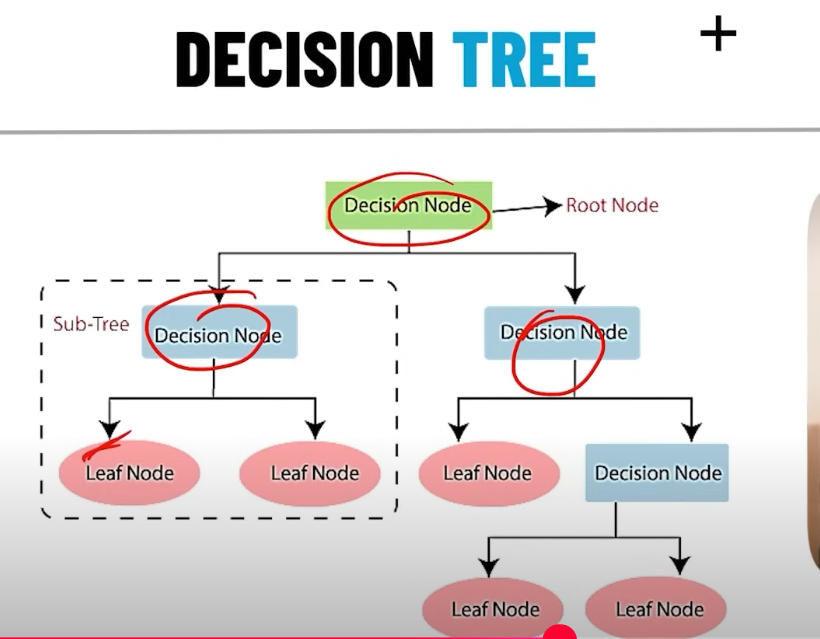

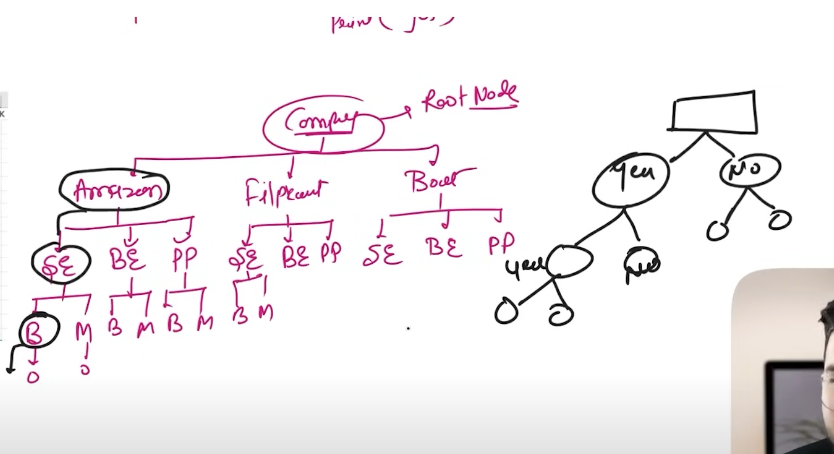

**Overfitting**
* Sometimes the DT get much big
* So to decrease the overfitting we use Pruning
* 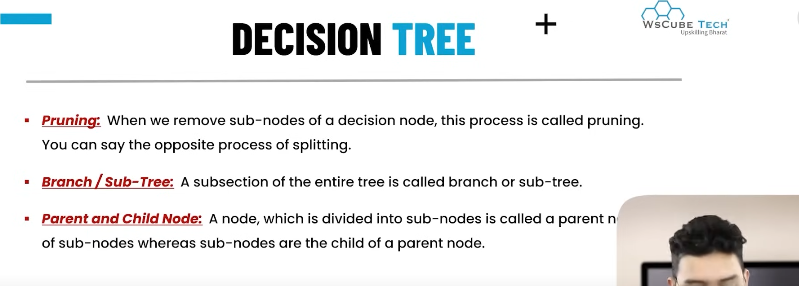

**Attribute Selection Measures** : While spitting the tree, by this measures we can get to know which node to chose at root and parent
1) Entropy
2) Information Gain

**Entropy**
* 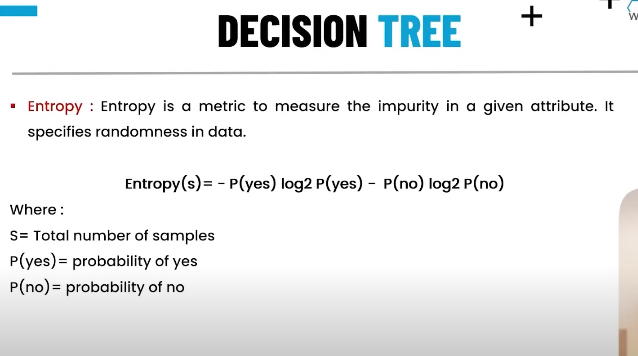
* Less the entropy, we should chosse it

**Information Gain** : Difference in the entropy before and after spitting
* Information Gain measures the reduction in entropy after a dataset is split on an attribute.


* Whenever the entropy is low the it will give high information gain we will choose that dataset
* 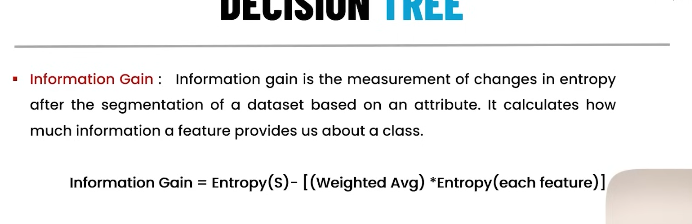

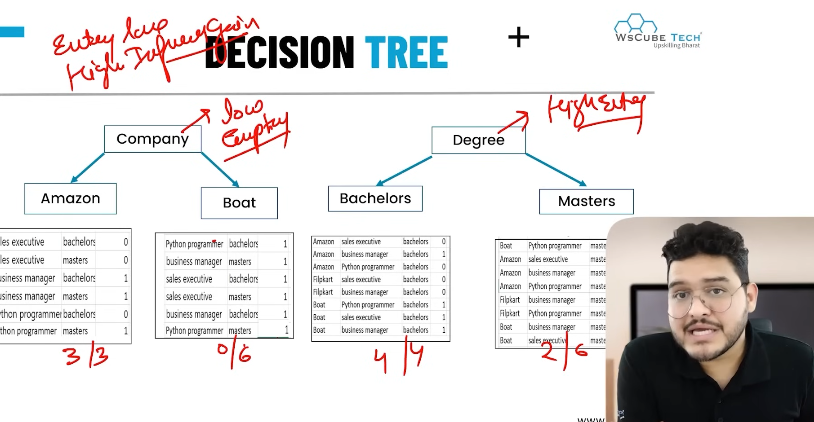

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r"D:\Data Science\Datasets\Social_Network_Ads.csv")
data.drop(columns=['User ID','Gender'], inplace=True)

In [8]:
data.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [9]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
x = data.iloc[:,:-1]
y = data['Purchased']

Now we can see that the age values are very less compared to the estimated salary  
So we need to do scaling

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [13]:
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [15]:
x.head(3)

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train , x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

* So as the **DT** works on non linear dataset So check it

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

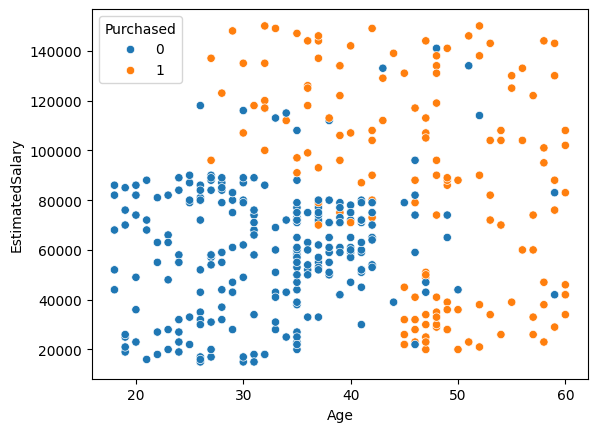

In [34]:
sns.scatterplot(x = 'Age', y='EstimatedSalary',data=data, hue='Purchased')

In [36]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Harsh Narayankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

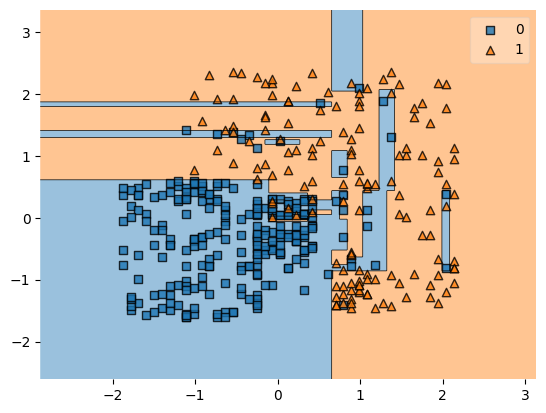

In [37]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dtc)

So this cannot be saparated through linear model

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
dtc.score(x_test, y_test)

0.8375

In [21]:
dtc.predict([[19,19000]])

C:\Users\Harsh Narayankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [22]:
dtc.predict([[35,20000]])

C:\Users\Harsh Narayankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

**Graphycal**

In [23]:
from sklearn.tree import plot_tree

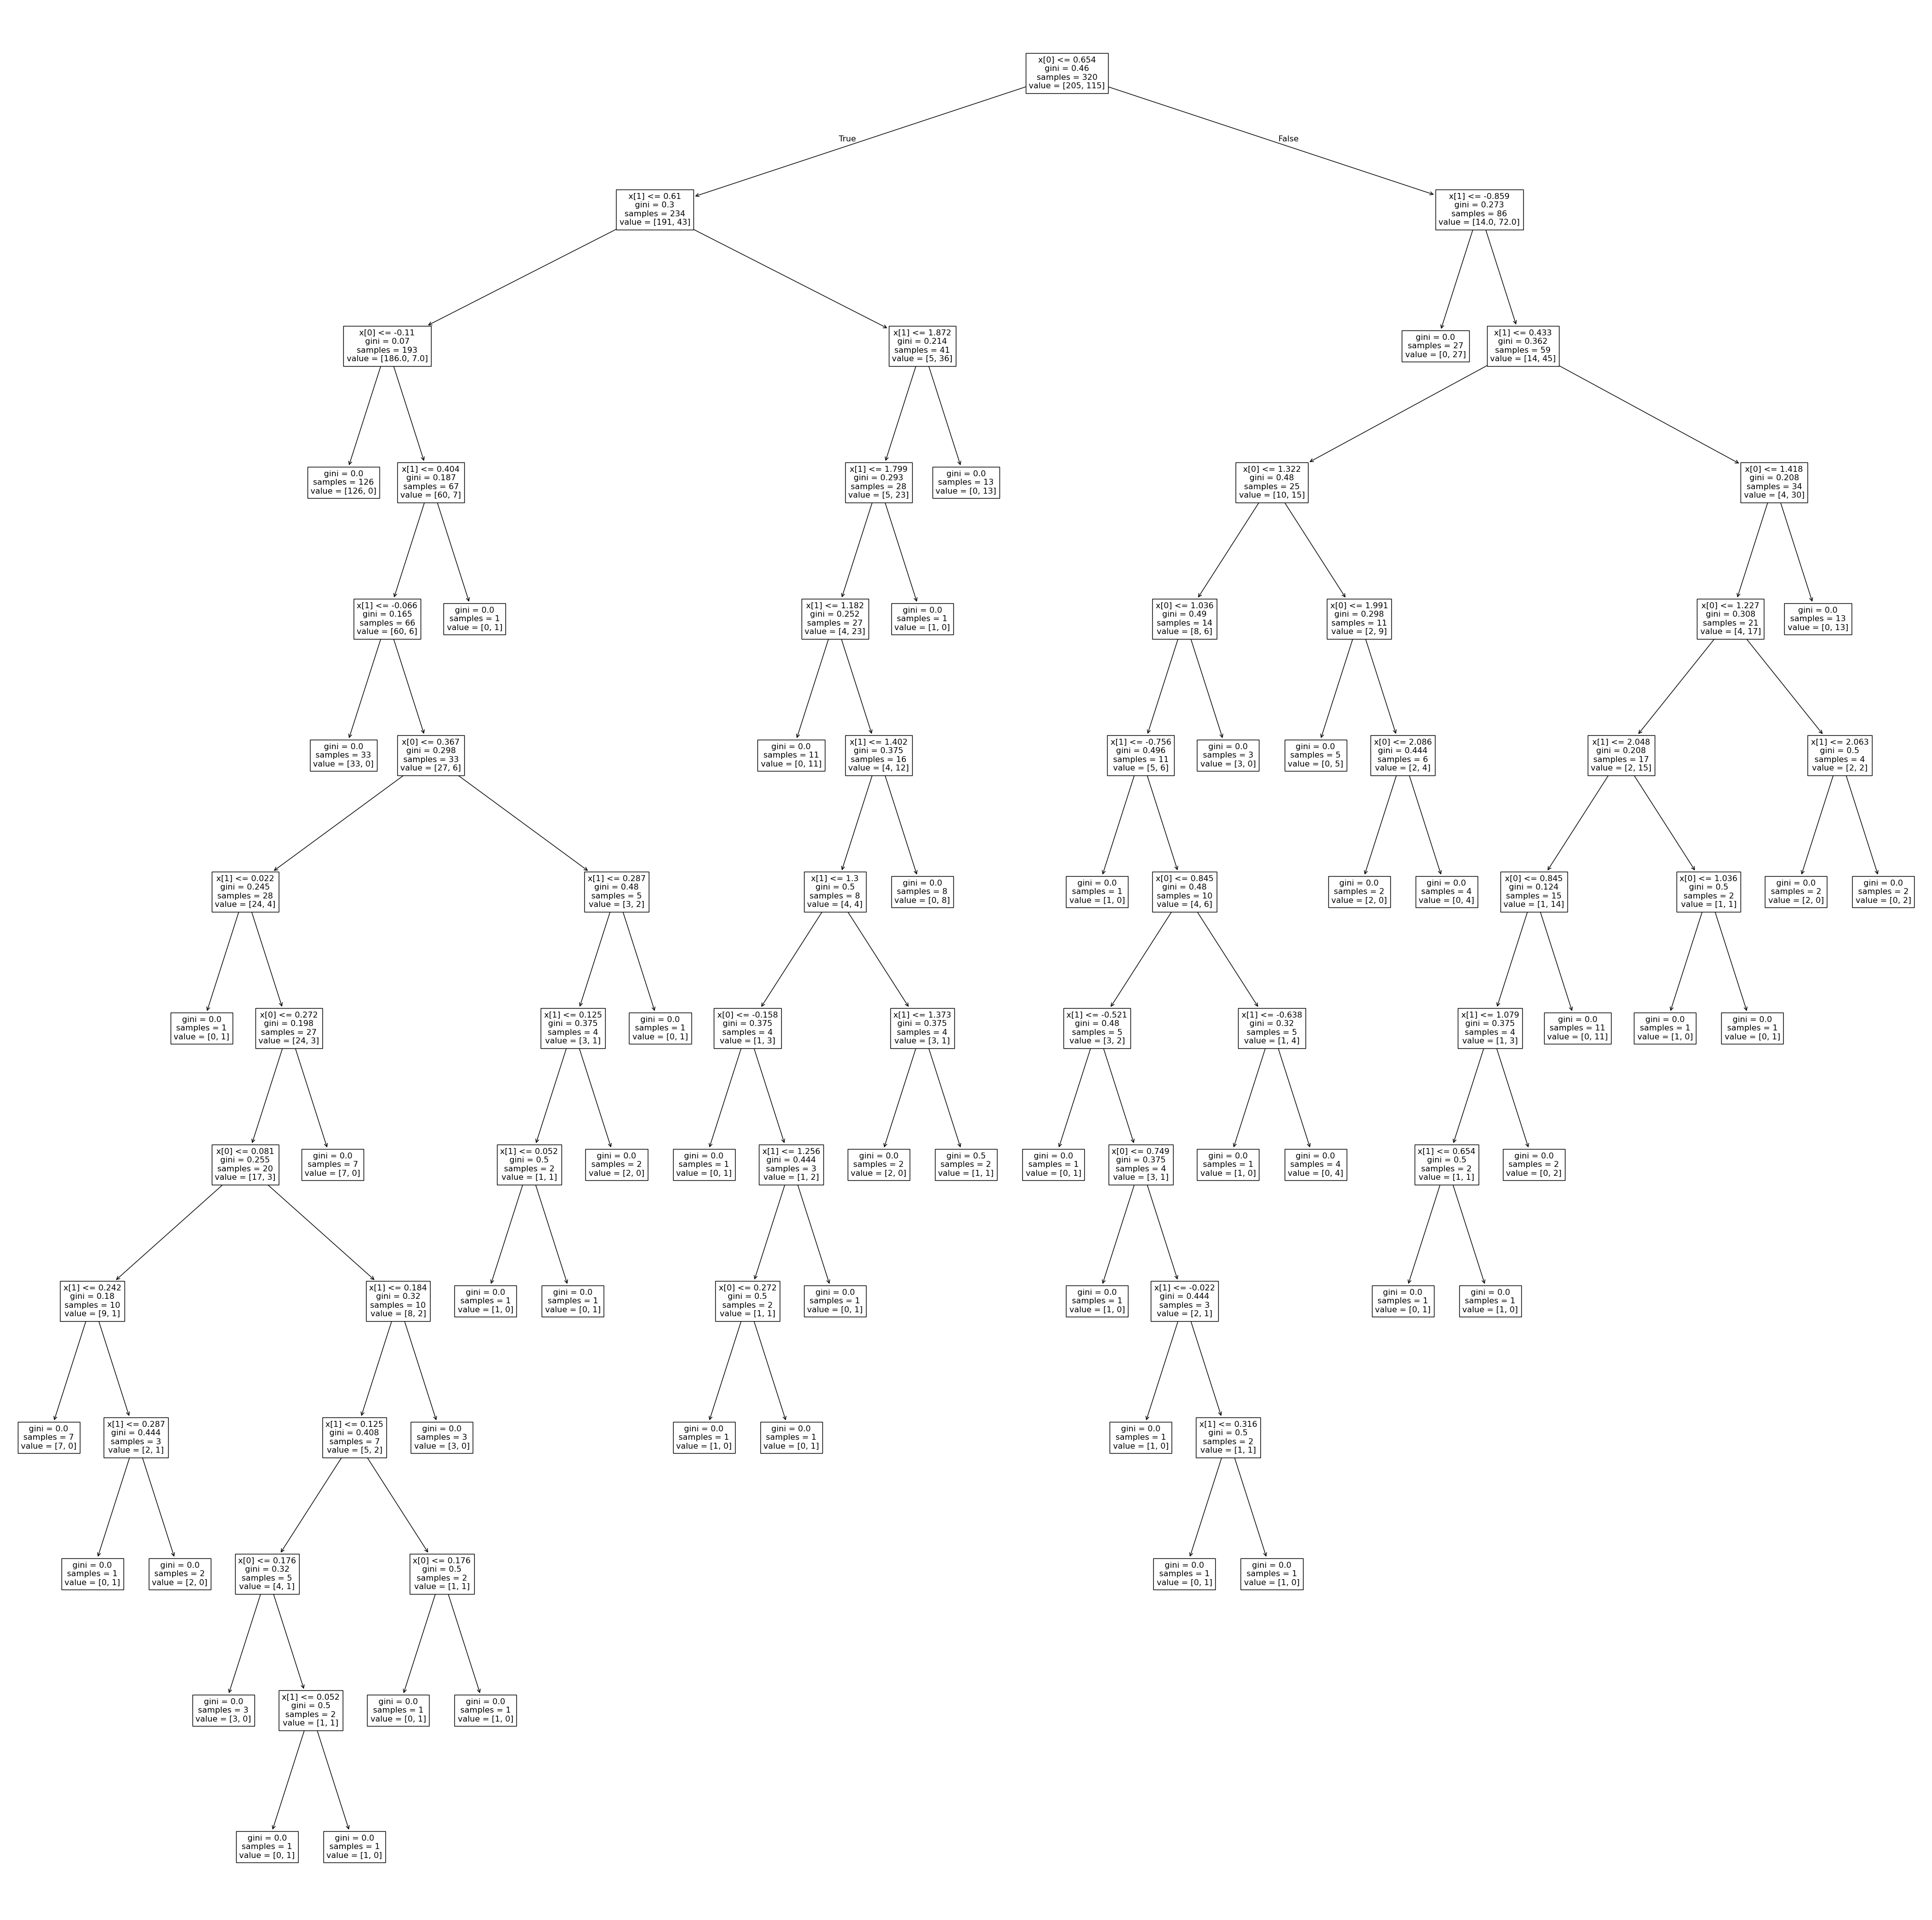

In [29]:
plt.figure(figsize=(50,50))
plot_tree(dtc)
plt.show()

* Were **x[0] is 'Age'**
* Were **x[1] is 'EstimatedSalary'**

* The model has been trained by **gini index**
* So now we will use entropy

In [30]:
dtc1 = DecisionTreeClassifier(criterion='entropy')
dtc1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
dtc1.score(x_test, y_test)

0.8375

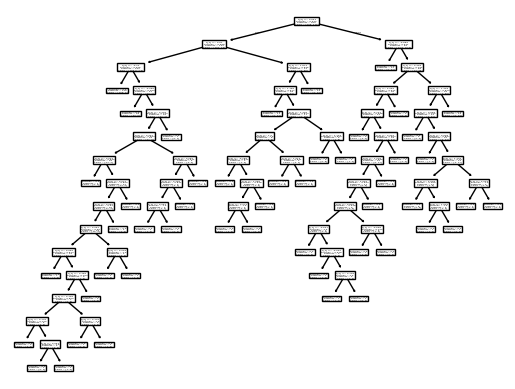

In [32]:
plot_tree(dtc1)
plt.show()

**Model Improvement**  
Overfitted models perform poor on new data  
Pruning helps by removing sections of the tree that provide little or no power in predicting target variables, making the model simpler, faster, and more generalizable.


* Use only when you think your model is beeing obverfitted i.e long DT
* *Pre-pruning* : Proning done before making model
* *Pos-pruning* : Train and then check level by level

How to check to overfitting?  
: if Training accuracy is more then Testing accuracy

In [38]:
dtc.score(x_train, y_train)

0.996875

In [39]:
dtc.score(x_test,y_test)

0.8375

We can see their is a lot of difference between them  
That means our model is overfitted

**Pre-pruning**
* max_depth (depth of dt) : is setted before training model

In [40]:
dt_pre_pruning = DecisionTreeClassifier(max_depth=5)
dt_pre_pruning.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [41]:
dt_pre_pruning.score(x_train, y_train)

0.934375

In [42]:
dt_pre_pruning.score(x_test, y_test)

0.9

Overftting model has be solved

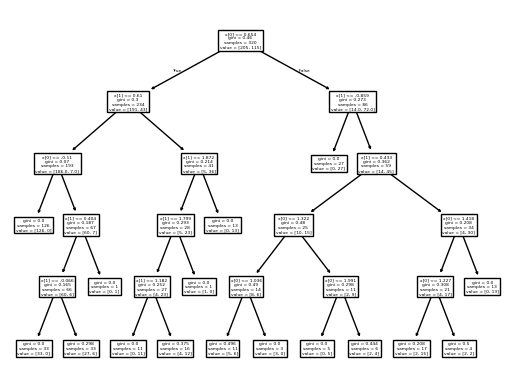

In [45]:
plot_tree(dt_pre_pruning)
plt.show()

**Post-pruning**
* we will change max_step value frequenty and use max accuracy

In [48]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train, y_train)
    print('Train score',dt2.score(x_train, y_train)," - ", 'Test score', dt2.score(x_test, y_test), "At depth", i)

Train score 0.821875  -  Test score 0.9 At depth 1
Train score 0.91875  -  Test score 0.9125 At depth 2
Train score 0.91875  -  Test score 0.9125 At depth 3
Train score 0.93125  -  Test score 0.9125 At depth 4
Train score 0.934375  -  Test score 0.9 At depth 5
Train score 0.95  -  Test score 0.8625 At depth 6
Train score 0.96875  -  Test score 0.85 At depth 7
Train score 0.975  -  Test score 0.85 At depth 8
Train score 0.98125  -  Test score 0.85 At depth 9
Train score 0.984375  -  Test score 0.85 At depth 10
Train score 0.990625  -  Test score 0.8375 At depth 11
Train score 0.99375  -  Test score 0.8375 At depth 12
Train score 0.996875  -  Test score 0.8375 At depth 13
Train score 0.996875  -  Test score 0.8375 At depth 14
Train score 0.996875  -  Test score 0.8375 At depth 15
Train score 0.996875  -  Test score 0.8375 At depth 16
Train score 0.996875  -  Test score 0.8375 At depth 17
Train score 0.996875  -  Test score 0.8375 At depth 18
Train score 0.996875  -  Test score 0.8375 At 

From above choise the best values , i.e both train and test score as same and high  
In this case it is at depth 2